In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [23]:
df = pd.read_csv('students_placement.csv')
df

,Unnamed: 0.1,Unnamed: 0,cgpa,iq,profile_score,placed
0,0,0,5.97,106,61,0
1,1,1,6.83,113,77,0
2,2,2,6.60,110,61,0
3,3,3,5.54,113,68,0
4,4,4,6.84,102,67,0
...,...,...,...,...,...,...
295,295,295,6.44,107,54,0
296,296,296,6.09,108,52,0
297,297,297,7.68,101,70,1
298,298,298,7.00,90,28,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.1   300 non-null    int64  
 1   Unnamed: 0     300 non-null    int64  
 2   cgpa           300 non-null    float64
 3   iq             300 non-null    int64  
 4   profile_score  300 non-null    int64  
 5   placed         300 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 14.2 KB


In [25]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,cgpa,iq,profile_score,placed
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,149.500000,149.500000,6.812000,102.570000,60.043333,0.506667
std,86.746758,86.746758,0.971568,8.326034,14.282440,0.500791
min,0.000000,0.000000,4.600000,83.000000,23.000000,0.000000
25%,74.750000,74.750000,6.010000,96.000000,51.000000,0.000000
50%,149.500000,149.500000,6.840000,103.500000,60.000000,1.000000
75%,224.250000,224.250000,7.502500,109.000000,69.000000,1.000000
max,299.000000,299.000000,9.300000,121.000000,100.000000,1.000000


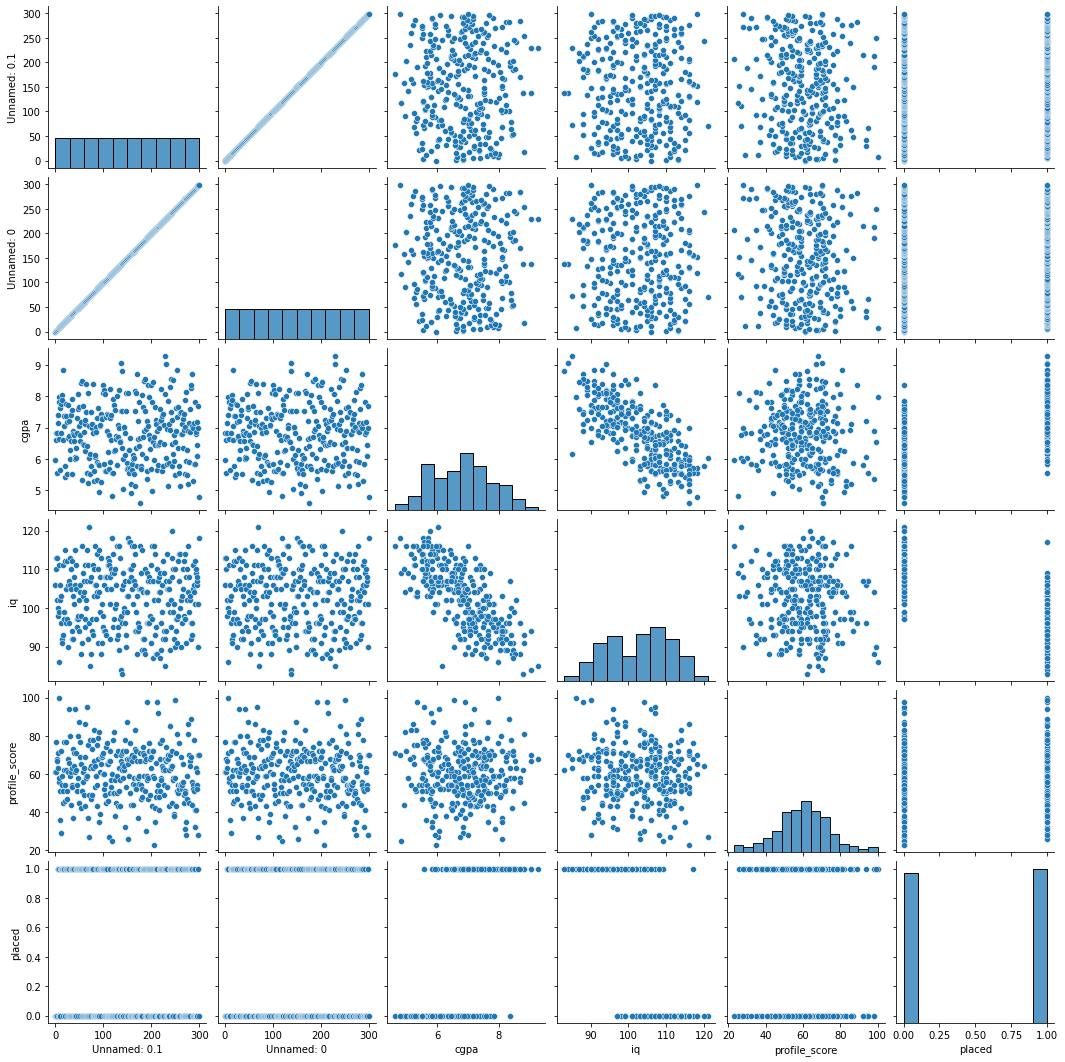

In [26]:
sns.pairplot(df)

In [27]:
X = df.drop(columns = ['placed'])
y = df['placed']
X

,Unnamed: 0.1,Unnamed: 0,cgpa,iq,profile_score
0,0,0,5.97,106,61
1,1,1,6.83,113,77
2,2,2,6.60,110,61
3,3,3,5.54,113,68
4,4,4,6.84,102,67
...,...,...,...,...,...
295,295,295,6.44,107,54
296,296,296,6.09,108,52
297,297,297,7.68,101,70
298,298,298,7.00,90,28


In [28]:
y

0      0
1      0
2      0
3      0
4      0
      ..
295    0
296    0
297    1
298    1
299    0
Name: placed, Length: 300, dtype: int64

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

X_train

,Unnamed: 0.1,Unnamed: 0,cgpa,iq,profile_score
158,158,158,4.90,110,44
150,150,150,5.67,103,68
102,102,102,8.21,94,52
163,163,163,5.52,116,58
112,112,112,6.75,111,27
...,...,...,...,...,...
203,203,203,8.47,87,72
255,255,255,6.34,112,54
72,72,72,6.15,85,63
235,235,235,5.12,105,68


In [30]:
y_test

189    0
123    1
185    1
213    0
106    0
127    1
176    0
73     0
275    1
242    0
266    0
147    1
299    0
58     1
122    0
78     0
11     0
167    0
220    1
29     1
27     0
110    0
251    1
12     1
105    1
18     1
297    1
90     1
293    0
184    1
139    1
248    1
229    1
59     0
51     0
88     0
95     1
164    0
80     0
217    1
221    1
228    1
191    0
4      0
70     0
222    1
249    1
161    0
16     0
208    0
0      0
284    1
285    1
175    0
288    1
119    0
62     1
180    1
214    0
193    0
Name: placed, dtype: int64

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr = LogisticRegression()

In [33]:
lr.fit(X_train,y_train)

LogisticRegression()

In [34]:
y_pred = lr.predict(X_test)
y_pred[0:10]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [35]:
y_test[0:10]

189    0
123    1
185    1
213    0
106    0
127    1
176    0
73     0
275    1
242    0
Name: placed, dtype: int64

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
score = accuracy_score(y_test,y_pred)
score

0.8833333333333333

In [38]:
df.to_csv("stud.csv")


In [39]:
import pickle 

In [40]:
pickle.dump(lr,open('stud.pkl','wb'))